a) Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Helper Functions

generate_data(): This function generates the data that we will be using later on. Make note that we are using np.einsum to generate the data, and that we are creating data with 3 features.

In [2]:
def generate_data():
    n, d = 100, 3
    x = np.random.uniform(-1, 1, (n, d))
    weights_true = np.array([[5, 2, 2],]).T
    bias_true = np.array([1])
    # Creating an equation for y_true using NumPy einsum
    y_true = (
        np.einsum('ij,jk->ik', x ** 3, weights_true) +
        np.einsum('ij,jk->ik', x ** 2, weights_true) +
        np.einsum('ij,jk->ik', x, weights_true) +
        bias_true
    )
    y_true = y_true.flatten()
    return x, y_true

In [3]:
# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# NumPy einsum implementation
def einsum(subscripts, *operands):
    return np.einsum(subscripts, *operands)


## Neural Network Class

In [4]:
# Neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.einsum('ij,jk->ik', X, self.W1) + self.b1
        self.A1 = tanh(self.Z1)
        self.Z2 = np.einsum('ij,jk->ik', self.A1, self.W2) + self.b2
        self.A2 = self.Z2
        return self.A2

    def backward(self, X, y, output):
        m = y.shape[0]
        dZ2 = output - y
        dW2 = np.einsum('ji,jk->ik', self.A1, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.einsum('ij,kj->ik', dZ2, self.W2.T) * tanh_derivative(self.Z1)
        dW1 = np.einsum('ji,jk->ik', X, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

The below function handles training the neural network and returns the new neural network object and loss history.

In [5]:
# Training the neural network
def train(X, y, hidden_size, learning_rate, epochs):
    input_size = 3
    output_size = 1
    nn = NeuralNetwork(input_size, hidden_size, output_size)

    loss_history = []  # Store the loss values at each epoch

    for i in range(epochs):
        output = nn.forward(X)
        loss = np.mean((output - y) ** 2)
        dW1, db1, dW2, db2 = nn.backward(X, y, output)
        nn.update_weights(dW1, db1, dW2, db2, learning_rate)
        loss_history.append(loss)  # Append the loss value to the loss_history list
        print(f"Epoch {i}: Loss = {loss}")

    return nn, loss_history

## Training Neural Network


### Generate Synthetic Data

In [6]:
# Generate synthetic data
x, y = generate_data()
X = x  # Use x directly as the input data
y = y.reshape(-1, 1)

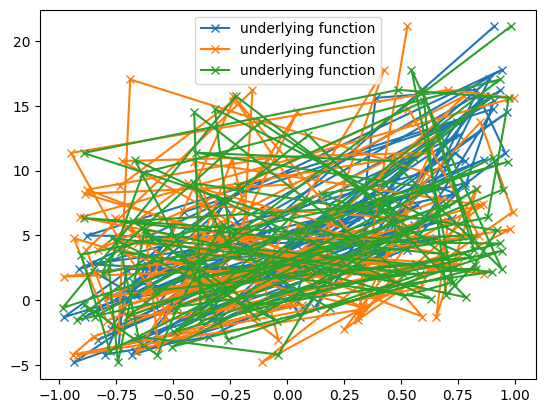

In [9]:
plt.plot(x, y, marker='x', label='underlying function')
plt.legend()

## Train Neural Network

In [10]:
# Train the neural network
hidden_size = 10
learning_rate = 0.01
epochs = 1000
nn, loss_history = train(X, y, hidden_size, learning_rate, epochs)

Epoch 0: Loss = 54.519819413050236
Epoch 1: Loss = 45.955415401769876
Epoch 2: Loss = 39.44677322420827
Epoch 3: Loss = 34.49403336160091
Epoch 4: Loss = 30.635467374741367
Epoch 5: Loss = 27.527353157498823
Epoch 6: Loss = 24.95240995622246
Epoch 7: Loss = 22.794176257498133
Epoch 8: Loss = 20.991799765485467
Epoch 9: Loss = 19.494177284200187
Epoch 10: Loss = 18.24309078881557
Epoch 11: Loss = 17.182577267221255
Epoch 12: Loss = 16.26855501644812
Epoch 13: Loss = 15.469895015877244
Epoch 14: Loss = 14.765499823473073
Epoch 15: Loss = 14.141199922054817
Epoch 16: Loss = 13.587519728974916
Epoch 17: Loss = 13.098264684759748
Epoch 18: Loss = 12.66968182669031
Epoch 19: Loss = 12.299979423611784
Epoch 20: Loss = 11.989032763656791
Epoch 21: Loss = 11.738094161314628
Epoch 22: Loss = 11.549241725362165
Epoch 23: Loss = 11.42414193709838
Epoch 24: Loss = 11.361578149337888
Epoch 25: Loss = 11.353549849660695
Epoch 26: Loss = 11.381366062660238
Epoch 27: Loss = 11.41585313341673
Epoch 28: 

## Testing Trained Network

In [11]:
# Test the trained network
test_x1 = np.linspace(-1, 1, 10)
test_x2 = np.linspace(-1, 1, 10)
test_x3 = np.linspace(-1, 1, 10)
test_X = np.array(np.meshgrid(test_x1, test_x2, test_x3)).T.reshape(-1, 3)
predicted_y = nn.forward(test_X)

## Data Visualizations

### Training Loss

Text(0.5, 1.0, 'Training Loss')

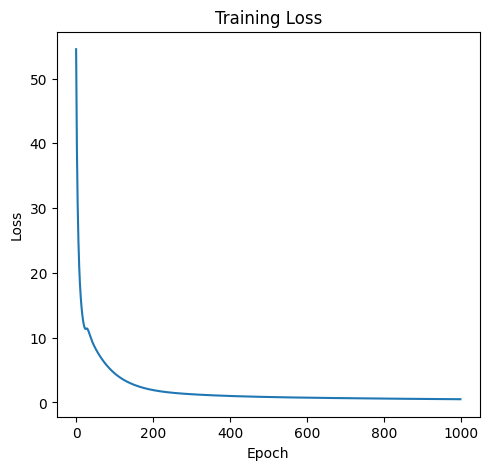

In [12]:
# Plot the results
fig = plt.figure(figsize=(12, 5))

# Plot the loss curve
ax1 = fig.add_subplot(121)
ax1.plot(loss_history)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')

### 4D-Plot

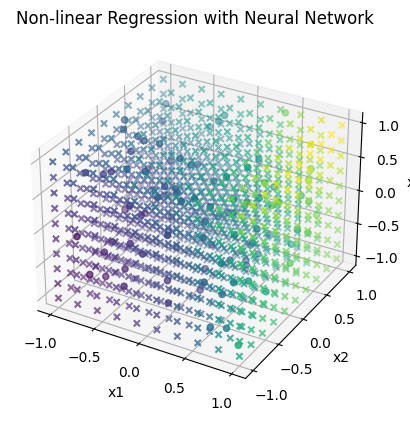

In [13]:
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis')
ax.scatter(test_X[:, 0], test_X[:, 1], test_X[:, 2], c=predicted_y, cmap='viridis', marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Non-linear Regression with Neural Network')
plt.show()